# install gy-redis

In [37]:
!pip install -U gy-redis

In [7]:
import redis
from gy_redis import (
    RedisImageHandler, 
    RedisDictHandler,
    RedisBytesHandler,
)

# redis from redis-py
https://github.com/redis/redis-py

In [12]:
redis_client = redis.Redis(
    host='localhost', 
    port=51201
)
redis_client.keys()

[]

# RedisImageHandler

In [13]:
import cv2
import matplotlib.pyplot as plt

In [27]:
cap = cv2.VideoCapture('http://commondatastorage.googleapis.com/gtv-videos-bucket/sample/BigBuckBunny.mp4')
# Because the image in the first few frames is black
# so we choose 600th frame for test
for _ in range(600):
    rect, img = cap.read()
cap.release()

In [38]:
# !pip install matplotlib

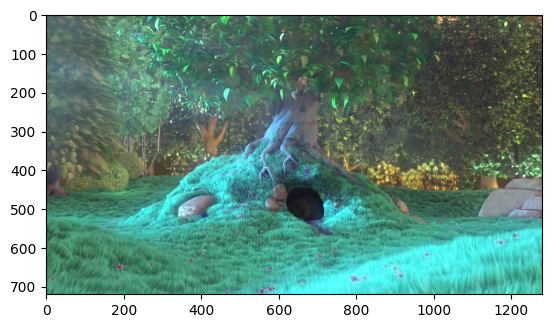

In [28]:
plt.imshow(img)

## write img to redis

In [31]:
# img to redis topic : 'test-img'
img_handler = RedisImageHandler(redis_client, 'test-img')

In [32]:
# set img
img_handler.set(img)

In [33]:
# so we got new key (if no-exist before)
redis_client.keys()

[b'test-img']

In [29]:
## read img from redis

In [35]:
img_from_redis = img_handler.get()

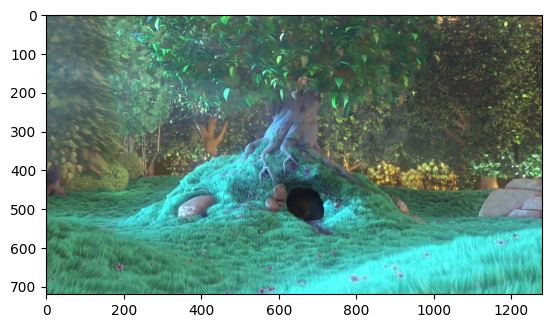

In [36]:
plt.imshow(img_from_redis)

What is the performance？ (in local redis)

for write

In [40]:
%%timeit
img_handler.set(img)

13.9 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


for read

In [41]:
%%timeit
img_handler.get()

7.7 ms ± 34.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# RedisDictHandler

In [42]:
# dict to redis topic : 'test-dict'
dict_handler = RedisDictHandler(redis_client, 'test-dict')

 write

In [45]:
dict_handler.set({
    "object" : [{
        'xyxy': [1,23,45,6],
        'label': 'person'
    }],
    'is_black': True,
    'companys': [
        {
            'id': 1,
            'departments': [
                {
                    'id': 1,
                    'name': 'RD'
                },
                {
                    'id': 2,
                    'name': 'HR'
                },
            ]
        }
    ]
})

get

In [46]:
dict_handler.get()

{'object': [{'xyxy': [1, 23, 45, 6], 'label': 'person'}],
 'is_black': True,
 'companys': [{'id': 1,
   'departments': [{'id': 1, 'name': 'RD'}, {'id': 2, 'name': 'HR'}]}]}